In [1]:
import numpy as np
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

In [2]:
square_size = 2.0
img_mask = "images/*.png"
pattern_size = (7, 9)

figsize = (20, 20)

In [3]:
img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2]

# Étape 1 : trouver tous les coins du plan de calibrage

processing images\IMG_2022.PNG... 
images\IMG_2022.PNG... OK
processing images\IMG_2023.PNG... 
images\IMG_2023.PNG... OK
processing images\IMG_2024.PNG... 
images\IMG_2024.PNG... OK
processing images\IMG_2025.PNG... 
images\IMG_2025.PNG... OK
processing images\IMG_2026.PNG... 
images\IMG_2026.PNG... OK
processing images\IMG_2027.PNG... 
images\IMG_2027.PNG... OK
processing images\IMG_2028.PNG... 
images\IMG_2028.PNG... OK
processing images\IMG_2029.PNG... 
chessboard not found
processing images\IMG_2030.PNG... 
images\IMG_2030.PNG... OK
processing images\IMG_2031.PNG... 
images\IMG_2031.PNG... OK
processing images\IMG_2032.PNG... 
images\IMG_2032.PNG... OK


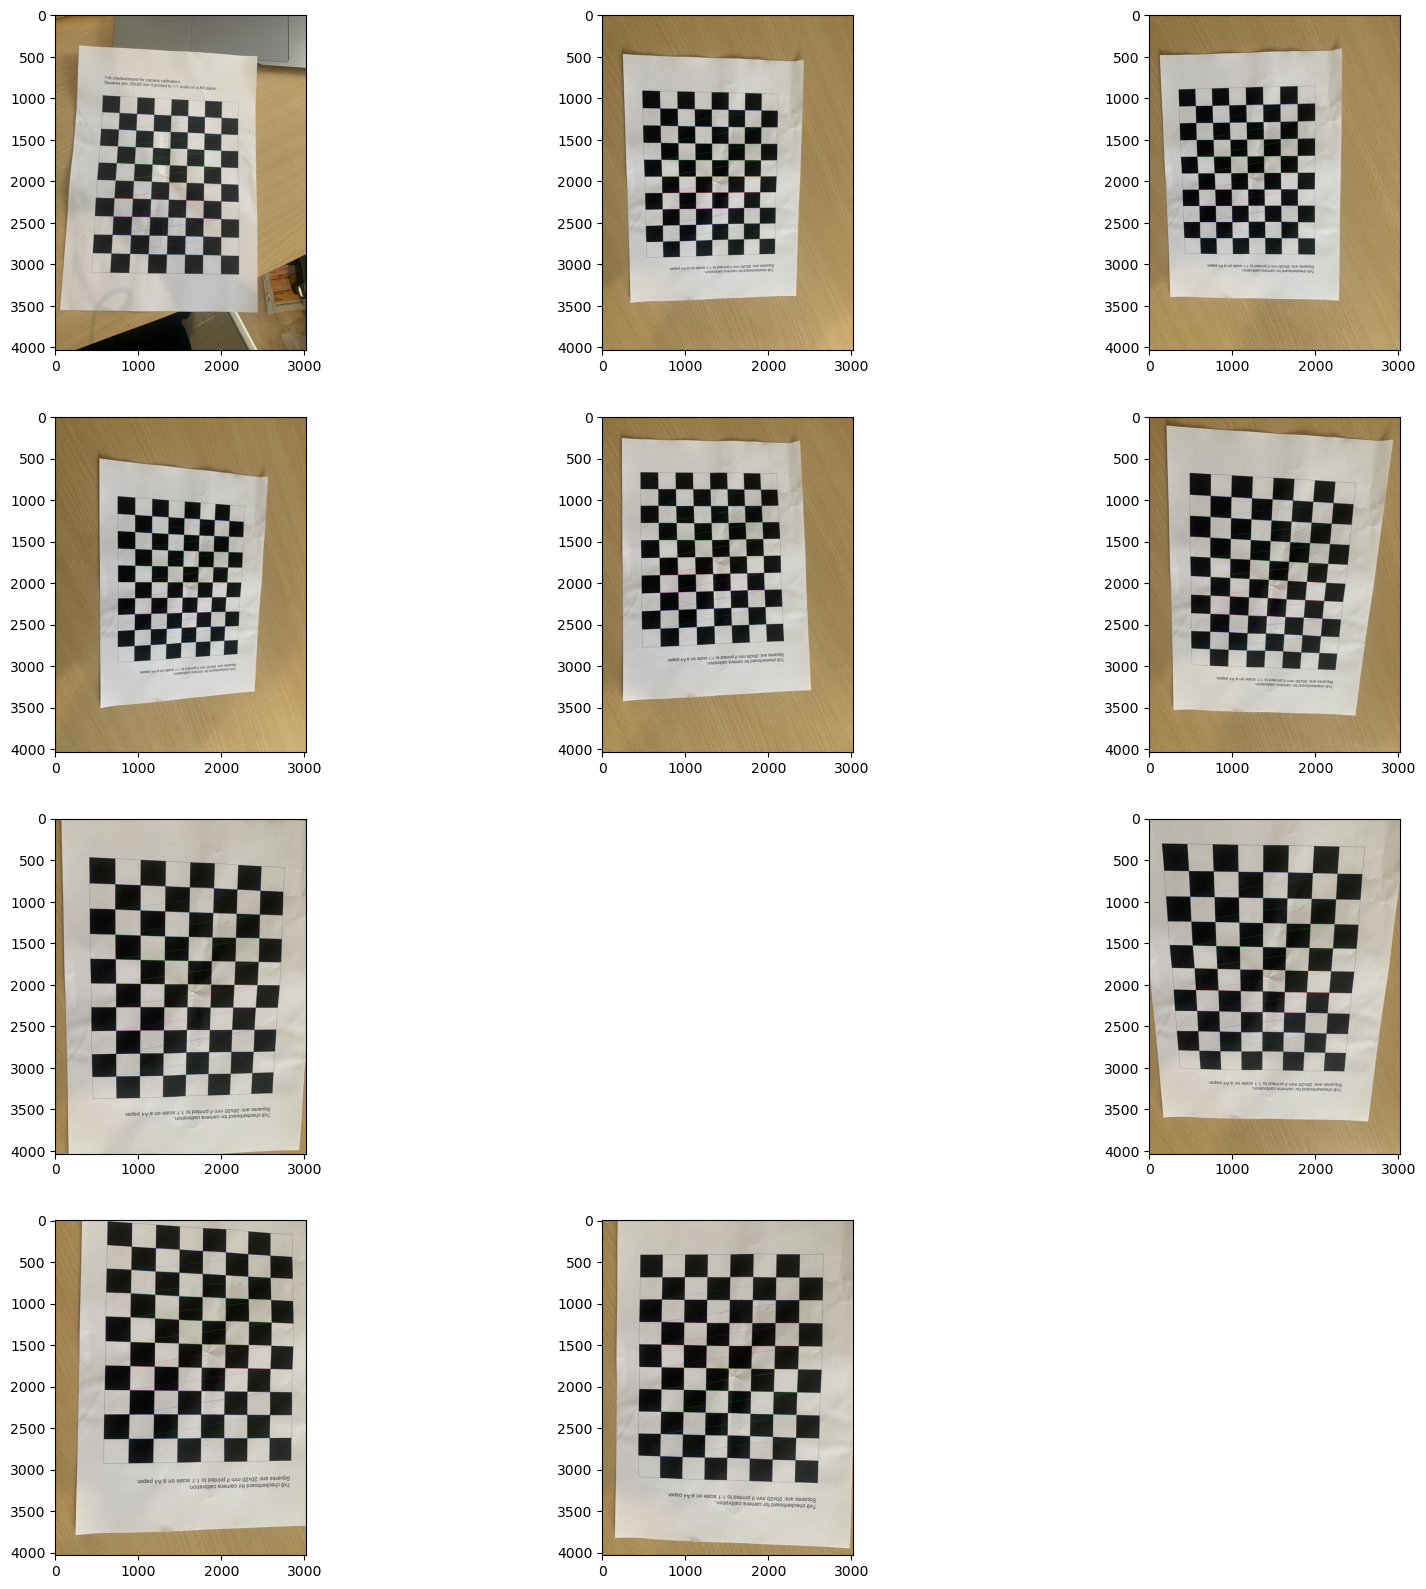

In [4]:
plt.figure(figsize=figsize)
keep_idxs=np.ones(num_images)
for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

    assert w == img.shape[1] and h == img.shape[0], f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    # # if you want to better improve the accuracy... cv2.findChessboardCorners already uses cv2.cornerSubPix
    # if found:
    #     term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
    #     cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)

    if not found:
        keep_idxs[i]=0
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        cv2.imwrite(os.path.join('processed_images',fn.split('\\')[-1]),img_w_corners)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()

In [5]:
img_names=[img_names[i] for i in range(num_images) if keep_idxs[i]==1]

# Étape 2 : obtenir les caractéristiques intrinsèques de la caméra + les coefficients de distorsion


In [6]:
# calculate camera distortion
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())


RMS: 2.479629261086798
camera matrix:
 [[3.04024857e+03 0.00000000e+00 1.48105062e+03]
 [0.00000000e+00 3.03447385e+03 2.01426083e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients:  [ 2.05853433e-01 -1.03426280e+00  7.20852043e-04 -4.77205455e-03
  1.33239975e+00]
